In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

def embedding_metrics_matrix(path):
    with open(path, 'r') as file:
        data = json.load(file)
    # Extracting the keys that contain the temporal comparisons
    #keys = [key for key in data.keys() if '_' in key]
    keys=['T1_T1', 'T1_T2', 'T1_T3', 'T1_T4', 'T2_T2', 'T2_T3', 'T2_T4', 'T3_T3', 'T3_T4', 'T4_T4']
    # Create an empty matrix for the distances
    matrix_size = 4
    # Assuming it's a square matrix
    cosine_similarity_matrix =np.full((matrix_size, matrix_size), np.nan)
    cosine_distance_matrix = np.full((matrix_size, matrix_size), np.nan)
    manhattan_distance_matrix = np.full((matrix_size, matrix_size), np.nan)
    euclidean_distance_matrix = np.full((matrix_size, matrix_size), np.nan)
    wasserstein_distance_matrix=np.full((matrix_size, matrix_size), np.nan)
    # Filling the matrices with the corresponding values
    for key in keys:
        i=int(key[1:].split('_T')[1])
        j=int(key[1:].split('_T')[0])
        cosine_distance_matrix[i-1, j-1] = data[key]['metrics']['cosine_distance']
        manhattan_distance_matrix[i-1, j-1] = data[key]['metrics']['manhattan_distance']
        euclidean_distance_matrix[i-1, j-1] = data[key]['metrics']['euclidean_distance']
        cosine_similarity_matrix[i-1, j-1] = data[key]['metrics']['cosine_similarity']
        wasserstein_distance_matrix[i-1, j-1] = data[key]['metrics']['wasserstain']

        cosine_distance_matrix[j-1, i-1] = data[key]['metrics']['cosine_distance']
        manhattan_distance_matrix[j-1, i-1] = data[key]['metrics']['manhattan_distance']
        euclidean_distance_matrix[j-1, i-1]= data[key]['metrics']['euclidean_distance']
        cosine_similarity_matrix[j-1, i-1] = data[key]['metrics']['cosine_similarity']
        wasserstein_distance_matrix[j-1, i-1] = data[key]['metrics']['wasserstain']

    return cosine_distance_matrix,cosine_similarity_matrix,euclidean_distance_matrix,manhattan_distance_matrix,wasserstein_distance_matrix


def token_metrics_matrix(path):
    with open(path, 'r') as file:
        data = json.load(file)
    keys=['T1_T1', 'T1_T2', 'T1_T3', 'T1_T4', 'T2_T2', 'T2_T3', 'T2_T4', 'T3_T3', 'T3_T4', 'T4_T4']
    # Create an empty matrix for the distances
    matrix_size = 4
    matrix = np.full((matrix_size, matrix_size), np.nan)
    for key in keys:
        i=int(key[1:].split('_T')[1])
        j=int(key[1:].split('_T')[0])
        matrix[i-1, j-1] = data[key]
        matrix[j-1, i-1] = data[key]
    return matrix


df_name='bioasq'
folder_path='/home/weisi/TemporalAssessment/analysis/'

jaccard_path=os.path.join(folder_path,'token_metrics',f'{df_name}_jaccard_results.json')
tfidf_path=os.path.join(folder_path,'token_metrics',f'{df_name}_cosine_tfidf_of_most_freq_tokens.json')
sbert_path=os.path.join(folder_path,'embedding_metrics_and_t-test',f'{df_name}_miniLM_t-test-results.json')
'''simcse_sup_path=os.path.join(folder_path,'embedding_metrics_and_t-test',f'{df_name}_simcse_sup_t-test-results.json')
simcse_unsup_path=os.path.join(folder_path,'embedding_metrics_and_t-test',f'{df_name}_simcse_unsup_t-test-results.json')'''
use_path=os.path.join(folder_path,'embedding_metrics_and_t-test',f'{df_name}_use_t-test-results.json')
biolord_path=os.path.join(folder_path,'embedding_metrics_and_t-test',f'{df_name}_biolord_t-test-results.json')
medcpt_path=os.path.join(folder_path,'embedding_metrics_and_t-test',f'{df_name}_medcpt_t-test-results.json')

jaccard_matrix=token_metrics_matrix(jaccard_path)
tfidf_matrix=token_metrics_matrix(tfidf_path)
sbert_cosine_dist_matrix,sbert_cosine_sim_matrix,sbert_euclidean_dist_matrix,sbert_manhattan_dist_matrix,sbert_wasserstein_dist_matrix=embedding_metrics_matrix(sbert_path)
biolord_cosine_dist_matrix,biolord_cosine_sim_matrix,biolord_euclidean_dist_matrix,biolord_manhattan_dist_matrix,biolord_wasserstein_dist_matrix=embedding_metrics_matrix(biolord_path)
medcpt_cosine_dist_matrix,medcpt_cosine_sim_matrix,medcpt_euclidean_dist_matrix,medcpt_manhattan_dist_matrix,medcpt_wasserstein_dist_matrix=embedding_metrics_matrix(medcpt_path)
use_cosine_dist_matrix,use_cosine_sim_matrix,use_euclidean_dist_matrix,use_manhattan_dist_matrix,use_wasserstein_dist_matrix=embedding_metrics_matrix(use_path)

In [2]:
import os
import json
import numpy as np
import math

base_path = "/HDD16TB/weisi/logs"
Task = 'BioASQ_alltypes_exact_new'
options = ['T1-T1', 'T1-T2', 'T1-T3', 'T1-T4', 'T2-T1','T2-T2', 'T2-T3', 'T2-T4',  'T3-T1', 'T3-T2','T3-T3', 'T3-T4','T4-T1','T4-T2','T4-T3', 'T4-T4']
model_name = 't5-base'
folder_name='b4a1_sd42_3e-4_maxanslen30_20epc'
seeds = range(1, 6)
# Adjusted metrics to focus on
metrics = ["rougeL", "meteor", "Geometric_Average_Precision"]  # Assuming rouge1 as an example for simplicity
#/HDD16TB/weisi/logs/BioASQ_alltypes_exact_new/t5-base/T2_T1/split_seed2/b4a1_sd42_3e-4_maxanslen30_20epc/predict_results.json
# Initialize matrix for each metric
performance_matrices = {metric: np.zeros((4, 4)) for metric in metrics}

for metric in metrics:
    for i in range(1, 5):  # D1 to D4
        for j in range(1, 5):  # D1 to D4
            values = []
            for seed in seeds:
                option = f'T{i}-T{j}'
                file_path = os.path.join(base_path, Task, model_name, option.replace('-', '_'), f"split_seed{seed}", folder_name, "predict_results.json")
                with open(file_path, 'r') as file:
                    data = json.load(file)
                    if metric == "rougeL":
                        value = data['test_rouge']['rougeL']
                    elif metric == "meteor":
                        value = data['test_meteor']['meteor']
                    elif metric == "Geometric_Average_Precision":
                        precisions = data['test_bleu']['precisions']
                        log_precisions = [math.log(p) for p in precisions if p > 0]
                        if log_precisions:  # Ensure there are non-zero precisions
                            avg_log_precision = sum(log_precisions) / len(log_precisions)
                            value = math.exp(avg_log_precision)
                        else:
                            value = 0
                    values.append(value)
            # Save 5 seeds mean for the metric
            performance_matrices[metric][j-1, i-1] = np.mean(values)

performance_vecs = {metric: matrix.flatten() for metric, matrix in performance_matrices.items()}
performance_change_matrices = {}
for metric, matrix in performance_matrices.items():
    change_matrix = np.zeros_like(matrix)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            change_matrix[i, j] = matrix[i, j] - matrix[i, i]  
    performance_change_matrices[metric] = change_matrix

performance_change_vecs = {metric: matrix.flatten() for metric, matrix in performance_change_matrices.items()}

performance_change_percentage_matrices = {}
for metric, matrix in performance_matrices.items():
    change_matrix = np.zeros_like(matrix)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            change_matrix[i, j] = (matrix[i, j] - matrix[i, i] )/matrix[i, i] 
    performance_change_percentage_matrices[metric] = change_matrix

performance_change_percentage_vecs = {metric: matrix.flatten() for metric, matrix in performance_change_percentage_matrices.items()}


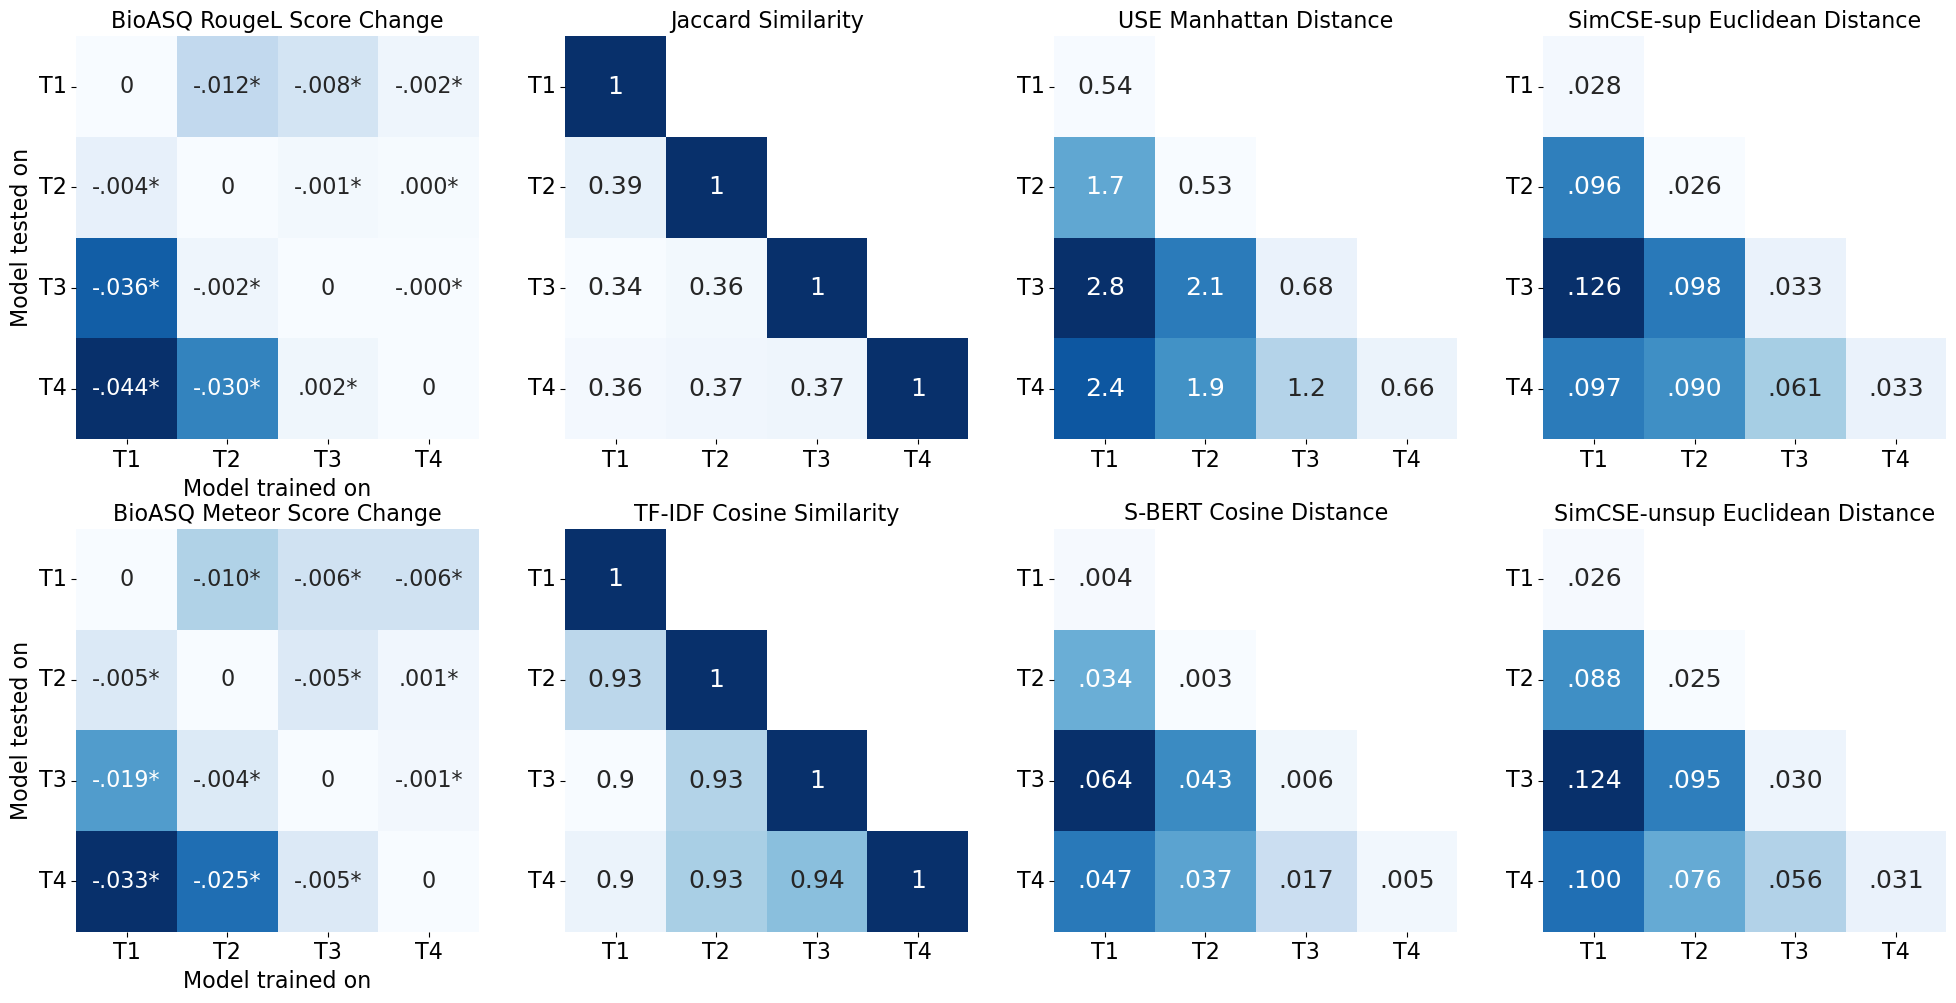

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors
# all matrixes to plot


matrices = [
    performance_change_matrices["rougeL"],
    jaccard_matrix,
    use_manhattan_dist_matrix,
    simcse_sup_euclidean_dist_matrix,

    performance_change_matrices["meteor"],
    tfidf_matrix,
    sbert_cosine_dist_matrix,
    #sbert_euclidean_dist_matrix,
    #sbert_manhattan_dist_matrix,
    #simcse_sup_cosine_dist_matrix,
    #simcse_sup_manhattan_dist_matrix,
    #simcse_unsup_cosine_dist_matrix,
    simcse_unsup_euclidean_dist_matrix,
    #simcse_unsup_manhattan_dist_matrix,
    #use_cosine_dist_matrix,
    #use_euclidean_dist_matrix,
    
]

titles = [
    "BioASQ RougeL Score Change", 
    "Jaccard Similarity",
    "USE Manhattan Distance",
    "SimCSE-sup Euclidean Distance",
    

    "BioASQ Meteor Score Change",
    "TF-IDF Cosine Similarity",
    "S-BERT Cosine Distance",
    "SimCSE-unsup Euclidean Distance",
    #"S-BERT Euclidean Distance",
    #"S-BERT Manhattan Distance",
    #"SimCSE-sup Cosine Distance",
    
    #"SimCSE-sup Manhattan Distance",
    #"SimCSE-unsup Cosine Distance",
    
    #"SimCSE-unsup Manhattan Distance",
    #"USE Cosine Distance",
    #"USE Euclidean Distance",
    
]


fig, axs = plt.subplots(2, 4, figsize=(20, 10))
tick_labels = ['T1', 'T2', 'T3', 'T4']
title_fontsize = 16 # 标题字体大小
axis_label_fontsize = 16  # 轴标签字体大小
tick_label_fontsize = 16
annot_kws={"fontsize": 18}

def remove_zero(x):
    if x == 0:
        return "0"
    elif abs(x) < 1:
        return f"{x:.3f}".replace("0.", ".").replace("-0.", "-.")
    else:
        return f"{x:.3f}"
    
def remove_zero_add_star(x):
    if x == 0:
        return "0"
    elif abs(x) < 0.05:  #rougel half width： t1_t1 0.03 t2_t2 0.02 t3_t3 0.03 t4-t4 0.02   meteor 0.02 0.02 0.03 0.02
        return f"{x:.3f}".replace("0.", ".").replace("-0.", "-.")+"*"
    elif abs(x) < 1:
        return f"{x:.3f}".replace("0.", ".").replace("-0.", "-.")
    else:
        return f"{x:.3f}"
#vlag  RdBu Blues coolwarm YlGnBu
for i, (matrix, title) in enumerate(zip(matrices, titles)):

    ax = axs[i // 4, i % 4] 
    if i % 4 == 0:  # for performance change matrix; first column
        mask = np.zeros_like(matrix, dtype=bool)
        # use abs value to fill color
        #sns.heatmap(np.abs(matrix), ax=ax, mask=mask, annot=matrix, cmap='Blues', square=True, cbar=False) #, xticklabels=tick_labels, yticklabels=tick_labels)
        sns.heatmap(np.abs(matrix), ax=ax, mask=mask, fmt='',annot=np.vectorize(remove_zero_add_star)(matrix), cmap='Blues', square=True, cbar=False, cbar_kws={'shrink': .5},annot_kws={"fontsize": 16})
        #sns.heatmap(matrix, ax=ax,mask=mask,fmt='', cmap='Blues', annot= np.vectorize(lambda x: f"{x:.2f}%")(matrix * 100), square=True, cbar=False) 
        # set x y -labels for sub plot
        ax.set_xlabel('Model trained on', fontsize=axis_label_fontsize)
        ax.set_ylabel('Model tested on', fontsize=axis_label_fontsize)
    elif i % 4 == 1: #second col Jaccard and tfidf
        mask = np.triu(np.ones_like(matrix, dtype=bool), k=1)
        sns.heatmap(matrix, ax=ax, mask=mask, annot=True, cmap='Blues', square=True, cbar=False, cbar_kws={'shrink': .5},annot_kws=annot_kws)
    elif i==2: #manhatan
        mask = np.triu(np.ones_like(matrix, dtype=bool), k=1)
        sns.heatmap(matrix, ax=ax, mask=mask, annot=True, cmap='Blues', square=True, cbar=False, cbar_kws={'shrink': .5},annot_kws=annot_kws)
    
    else:  # for metrics
        mask = np.triu(np.ones_like(matrix, dtype=bool), k=1)
        sns.heatmap(matrix, ax=ax, mask=mask, fmt='',annot=np.vectorize(remove_zero)(matrix), cmap='Blues', square=True, cbar=False, cbar_kws={'shrink': .5},annot_kws=annot_kws)
    
    ax.set_title(title, fontsize=title_fontsize)
    ax.set_xticklabels(tick_labels, rotation=0, fontsize=tick_label_fontsize)
    ax.set_yticklabels(tick_labels, rotation=0, fontsize=tick_label_fontsize)


plt.tight_layout()
plt.savefig("/home/weisi/TemporalAssessment/analysis/pictures/heatmaps/BioASQ_perf_heatmaps_smaller_size.pdf", bbox_inches='tight')
plt.show()

In [3]:
# 假设矩阵已经定义
# matrices_list 包含所有需要计算极值比率的矩阵
matrices_list = [
    jaccard_matrix,
    
    tfidf_matrix,

    use_cosine_dist_matrix,
    use_euclidean_dist_matrix,
    use_manhattan_dist_matrix,

    sbert_cosine_dist_matrix,
    sbert_euclidean_dist_matrix,
    sbert_manhattan_dist_matrix,

    
    biolord_cosine_dist_matrix,
    biolord_euclidean_dist_matrix,
    biolord_manhattan_dist_matrix,

    medcpt_cosine_dist_matrix,
    medcpt_euclidean_dist_matrix,
    medcpt_manhattan_dist_matrix,
]

# 矩阵名称，用于输出结果
matrices_names = [
    "Jaccard Similarity",    
    "TF-IDF Cosine Similarity",

    "USE Cosine Distance",
    "USE Euclidean Distance",
    "USE Manhattan Distance",

    "S-BERT Cosine Distance",    
    "S-BERT Euclidean Distance",
    "S-BERT Manhattan Distance",
    
    "BioLORD Cosine Distance",
    "BioLORD Euclidean Distance",
    "BioLORD Manhattan Distance",

    "MedCPT Cosine Distance",
    "MedCPT Euclidean Distance",
    "MedCPT Manhattan Distance",    
]

for name, matrix in zip(matrices_names, matrices_list):
    variability = (np.max(matrix)-np.min(matrix))/ np.max(matrix)
    extremes_ratio = np.max(matrix) / np.min(matrix)
    print(f'{name} Extremes Ratio: \t \t {extremes_ratio:.2f}')
    #print(f'{variability:.3f}')



Jaccard Similarity Extremes Ratio: 	 	 2.92
TF-IDF Cosine Similarity Extremes Ratio: 	 	 1.11
USE Cosine Distance Extremes Ratio: 	 	 22.89
USE Euclidean Distance Extremes Ratio: 	 	 5.13
USE Manhattan Distance Extremes Ratio: 	 	 5.25
S-BERT Cosine Distance Extremes Ratio: 	 	 18.58
S-BERT Euclidean Distance Extremes Ratio: 	 	 4.30
S-BERT Manhattan Distance Extremes Ratio: 	 	 4.29
BioLORD Cosine Distance Extremes Ratio: 	 	 15.20
BioLORD Euclidean Distance Extremes Ratio: 	 	 3.88
BioLORD Manhattan Distance Extremes Ratio: 	 	 3.88
MedCPT Cosine Distance Extremes Ratio: 	 	 27.79
MedCPT Euclidean Distance Extremes Ratio: 	 	 5.29
MedCPT Manhattan Distance Extremes Ratio: 	 	 5.28


In [3]:
# performance_matrices = {'f1': predict_micro_f1_matrix, 'precision': predict_micro_precision_matrix, 'recall': predict_micro_recall_matrix}
from scipy.stats import pearsonr
# matrix 2 vector

jaccard_vec = jaccard_matrix.flatten()
tfidf_vec = tfidf_matrix.flatten()

sbert_cos = sbert_cosine_dist_matrix.flatten()
sbert_euc = sbert_euclidean_dist_matrix.flatten()
sbert_man = sbert_manhattan_dist_matrix.flatten()

biolord_cos = biolord_cosine_dist_matrix.flatten()
biolord_euc = biolord_euclidean_dist_matrix.flatten()
biolord__man = biolord_manhattan_dist_matrix.flatten()

medcpt_cos = medcpt_cosine_dist_matrix.flatten()
medcpt_euc= medcpt_euclidean_dist_matrix.flatten()
medcpt_man = medcpt_manhattan_dist_matrix.flatten()
        
use_cos = use_cosine_dist_matrix.flatten()
use_euc = use_euclidean_dist_matrix.flatten()
use_man = use_manhattan_dist_matrix.flatten()
        
# performance_vecs = {metric: matrix.flatten() for metric, matrix in performance_matrices.items()}
'''
dist_vecs = {
    'jaccard_vec':jaccard_vec,
    'tfidf_vec':tfidf_vec,
    'use_cos': use_cos,
    'use_euc': use_euc,
    'use_man': use_man,
    'sbert_cos': sbert_cos,
    'sbert_euc': sbert_euc,
    'sbert_man': sbert_man,
    'biolord_cos': biolord_cos,
    'biolord_euc': biolord_euc,
    'biolord__man': biolord__man,
    'medcpt_cos': medcpt_cos,
    'medcpt_euc': medcpt_euc,
    'medcpt_man': medcpt_man,
    # Add other vectors here
}'''


use_wass=use_wasserstein_dist_matrix.flatten()
sbert_wass=sbert_wasserstein_dist_matrix.flatten()
biolord_wass=biolord_wasserstein_dist_matrix.flatten()
medcpt_wass=medcpt_wasserstein_dist_matrix.flatten()
# performance_vecs = {metric: matrix.flatten() for metric, matrix in performance_matrices.items()}

dist_vecs = {
    'use_wasserstein':use_wass,
    'sbert_wasserstein':sbert_wass,
    'biolord_wasserstein':biolord_wass,
    'medcpt_wasserstein':medcpt_wass,
    # Add other vectors here
}
# Calculate correlation matrix with p-values ["predict_samples_f1"]
correlation_matrix = {}
p_value_matrix = {}
for metric, perf_vec in performance_change_vecs.items():
    correlations = {}
    p_values = {}
    for comp_metric, comp_perf_vec in dist_vecs.items():
        r_value, p_value = pearsonr(perf_vec, comp_perf_vec)
        correlations[comp_metric] = r_value
        p_values[comp_metric] = p_value
    correlation_matrix[metric] = correlations
    p_value_matrix[metric] = p_values

# Print correlation matrix with p-values
for metric, correlations in correlation_matrix.items():
    print(f"{metric} performance change correlations :")
    for comp_metric, r_value in correlations.items():
        p_value = p_value_matrix[metric][comp_metric]
        print(f"{comp_metric}: r = {r_value:.2f}, p = {p_value:.4f}")
    print("\n")


rougeL performance change correlations :
use_wasserstein: r = -0.59, p = 0.0168
sbert_wasserstein: r = -0.40, p = 0.1267
biolord_wasserstein: r = -0.53, p = 0.0362
medcpt_wasserstein: r = -0.58, p = 0.0182


meteor performance change correlations :
use_wasserstein: r = -0.57, p = 0.0203
sbert_wasserstein: r = -0.40, p = 0.1287
biolord_wasserstein: r = -0.55, p = 0.0289
medcpt_wasserstein: r = -0.60, p = 0.0149


Geometric_Average_Precision performance change correlations :
use_wasserstein: r = -0.19, p = 0.4921
sbert_wasserstein: r = -0.16, p = 0.5646
biolord_wasserstein: r = -0.21, p = 0.4432
medcpt_wasserstein: r = -0.20, p = 0.4561




In [60]:
# compute pearson correlation_matrix
correlation_matrix = {}

for metric, perf_vec in performance_change_vecs.items():
    correlations = {
        'jaccard': np.corrcoef(perf_vec, jaccard_vec)[0, 1],
        'tfidf': np.corrcoef(perf_vec, tfidf_vec)[0, 1],
        'cosine_dist': np.corrcoef(perf_vec, cosine_dist_vec)[0, 1],
        'euclidean_dist': np.corrcoef(perf_vec, euclidean_dist_vec)[0, 1],
        'manhattan_dist': np.corrcoef(perf_vec, manhattan_dist_vec)[0, 1]
    }
    correlation_matrix[metric] = correlations

# 
for metric, correlations in correlation_matrix.items():
    print(f"{metric} Performance Change Correlations with:")
    for key, value in correlations.items():
        print(f"{key}: {value}")
    print("\n")

rougeL Performance Change Correlations with:
jaccard: 0.36161220122734206
tfidf: 0.505911948543265
cosine_dist: -0.5423518144664766
euclidean_dist: -0.5206232364587841
manhattan_dist: -0.5156631004264838


meteor Performance Change Correlations with:
jaccard: 0.45482992421476154
tfidf: 0.560314154473286
cosine_dist: -0.5424688442772757
euclidean_dist: -0.5506264811142304
manhattan_dist: -0.5469614183616271


Geometric_Average_Precision Performance Change Correlations with:
jaccard: 0.20426046173828427
tfidf: 0.22035171309526252
cosine_dist: -0.18483993600676202
euclidean_dist: -0.1946584652090381
manhattan_dist: -0.19248150580786033




In [61]:
# compute pearson correlation_matrix
correlation_matrix = {}

for metric, perf_vec in performance_change_percentage_vecs.items():
    correlations = {
        'jaccard': np.corrcoef(perf_vec, jaccard_vec)[0, 1],
        'tfidf': np.corrcoef(perf_vec, tfidf_vec)[0, 1],
        'cosine_dist': np.corrcoef(perf_vec, cosine_dist_vec)[0, 1],
        'euclidean_dist': np.corrcoef(perf_vec, euclidean_dist_vec)[0, 1],
        'manhattan_dist': np.corrcoef(perf_vec, manhattan_dist_vec)[0, 1]
    }
    correlation_matrix[metric] = correlations

# 
for metric, correlations in correlation_matrix.items():
    print(f"{metric} Performance change percentage correlations with:")
    for key, value in correlations.items():
        print(f"{key}: {value}")
    print("\n")

rougeL Performance change percentage correlations with:
jaccard: 0.3951070153817092
tfidf: 0.550723111840508
cosine_dist: -0.5868266618889316
euclidean_dist: -0.5652679481750428
manhattan_dist: -0.5617561665698585


meteor Performance change percentage correlations with:
jaccard: 0.5106930448542085
tfidf: 0.6377908590189086
cosine_dist: -0.6187525533641807
euclidean_dist: -0.6271610009049703
manhattan_dist: -0.62552673120149


Geometric_Average_Precision Performance change percentage correlations with:
jaccard: 0.042685185775368756
tfidf: -0.010329114961437711
cosine_dist: 0.04369277587087268
euclidean_dist: 0.023625867055814063
manhattan_dist: 0.025624438141707177




In [33]:
import statsmodels.api as sm


perf_metric = 'rougeL'  
perf_vec = performance_matrices[perf_metric].flatten()

# 创建设计矩阵 X，包含所有指标的向量，加上截距项
X = np.column_stack([jaccard_vec, tfidf_vec, cosine_dist_vec, euclidean_dist_vec, manhattan_dist_vec])
X = sm.add_constant(X)  # 添加截距项

# 创建模型并拟合
model = sm.OLS(perf_vec, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                 -0.148
Method:                 Least Squares   F-statistic:                    0.6139
Date:                Thu, 07 Mar 2024   Prob (F-statistic):              0.692
Time:                        16:03:31   Log-Likelihood:                 22.059
No. Observations:                  16   AIC:                            -32.12
Df Residuals:                      10   BIC:                            -27.48
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0078      3.101     -0.325      0.7

/home/weisi/anaconda3/envs/tempo0/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [34]:
import statsmodels.api as sm


perf_metric = 'rougeL'  
y=performance_change_vecs[perf_metric]
# 创建设计矩阵 X，包含所有指标的向量，加上截距项
X = np.column_stack([jaccard_vec, tfidf_vec, cosine_dist_vec, euclidean_dist_vec, manhattan_dist_vec])
X = sm.add_constant(X)  # 添加截距项

# 创建模型并拟合
model_rlm = sm.RLM(y, X, M=sm.robust.norms.HuberT())
results_rlm = model_rlm.fit()

print(results_rlm.summary())




                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                   16
Model:                            RLM   Df Residuals:                       10
Method:                          IRLS   Df Model:                            5
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 07 Mar 2024                                         
Time:                        16:04:36                                         
No. Iterations:                    50                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8868      0.333     -2.662      0.0

In [36]:
import statsmodels.api as sm


perf_metric = 'rougeL'  
y=performance_change_vecs[perf_metric]
# 创建设计矩阵 X，包含所有指标的向量，加上截距项
X = np.column_stack([jaccard_vec, tfidf_vec, cosine_dist_vec])
X = sm.add_constant(X)  # 添加截距项

# 创建模型并拟合
model_rlm = sm.RLM(y, X, M=sm.robust.norms.HuberT())
results_rlm = model_rlm.fit()

print(results_rlm.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                   16
Model:                            RLM   Df Residuals:                       12
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 07 Mar 2024                                         
Time:                        16:05:02                                         
No. Iterations:                    50                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6549      0.177     -3.696      0.0

In [37]:
import statsmodels.api as sm


perf_metric = 'meteor'  
y=performance_change_vecs[perf_metric]
# 创建设计矩阵 X，包含所有指标的向量，加上截距项
X = np.column_stack([jaccard_vec, tfidf_vec, cosine_dist_vec, euclidean_dist_vec, manhattan_dist_vec])
X = sm.add_constant(X)  # 添加截距项

# 创建模型并拟合
model_rlm = sm.RLM(y, X, M=sm.robust.norms.HuberT())
results_rlm = model_rlm.fit()

print(results_rlm.summary())



                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                   16
Model:                            RLM   Df Residuals:                       10
Method:                          IRLS   Df Model:                            5
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 07 Mar 2024                                         
Time:                        16:05:33                                         
No. Iterations:                    50                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3807      0.272     -1.400      0.1

In [38]:
import statsmodels.api as sm


perf_metric = 'meteor'  
y=performance_change_vecs[perf_metric]
# 创建设计矩阵 X，包含所有指标的向量，加上截距项
X = np.column_stack([jaccard_vec, tfidf_vec, cosine_dist_vec])
X = sm.add_constant(X)  # 添加截距项

# 创建模型并拟合
model_rlm = sm.RLM(y, X, M=sm.robust.norms.HuberT())
results_rlm = model_rlm.fit()

print(results_rlm.summary())



                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                   16
Model:                            RLM   Df Residuals:                       12
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 07 Mar 2024                                         
Time:                        16:05:55                                         
No. Iterations:                    33                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3714      0.225     -1.651      0.0

In [39]:
import statsmodels.api as sm


perf_metric = 'Geometric_Average_Precision'  
y=performance_change_vecs[perf_metric]
# 创建设计矩阵 X，包含所有指标的向量，加上截距项
X = np.column_stack([jaccard_vec, tfidf_vec, cosine_dist_vec])
X = sm.add_constant(X)  # 添加截距项

# 创建模型并拟合
model_rlm = sm.RLM(y, X, M=sm.robust.norms.HuberT())
results_rlm = model_rlm.fit()

print(results_rlm.summary())



                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                   16
Model:                            RLM   Df Residuals:                       12
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 07 Mar 2024                                         
Time:                        16:06:38                                         
No. Iterations:                    50                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1576      0.697     -0.226      0.8